My inferential report has two parts: before movie’s announcement and after movie’s announcement. If I am an investor, I would love to know whether I can make money from the movie. At least, I would not make some bad decisions leading a huge money loss. It is also better to know about it at the day 1 of my movie plan. This will belong to the part of “Before movie’s announcement”. However, there is also a lot of signs that we can tell the revenue direction after the movie announced. Even it is the best timing to realize we are gonna lose money (if it is a negative revenue), there is some possible ways to rescue the situation in the early phase. This will belong to “After movie’s announcement”.

In [1]:
# import required packages
import pandas as pd
import numpy as np
import math
from collections import Counter

In [2]:
# import plot packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('wrangle.csv')

In [150]:
# add revenue column
df['revenue'] = df.gross - df.budget

# change unit to 1 million
df.budget = df['budget'] / 1000000
df.gross = df['gross'] / 1000000
df.revenue = df['revenue'] / 1000000

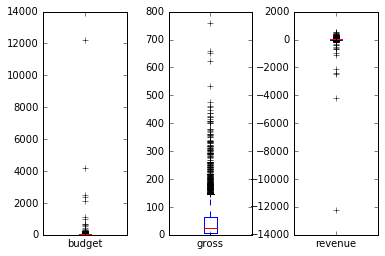

In [5]:
plt.subplot(1, 3, 1)
df['budget'].plot(kind='box')

plt.subplot(1, 3, 2)
df['gross'].plot(kind='box')

plt.subplot(1, 3, 3)
df['revenue'].plot(kind='box')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [6]:
# roughly set a boundary for outlier removal from the boxplot 
budget_outlier = df[(df.budget < 400) & (df.budget > 0)]
gross_outlier = df[(df.gross < 300) & (df.budget > 0)]
revenue_outlier = df[(df.revenue > -400) & (df.revenue < 400)]

In [7]:
# make sure I did not remove too many data points
print(len(budget_outlier), len(gross_outlier), len(revenue_outlier))

(4087, 4037, 4082)


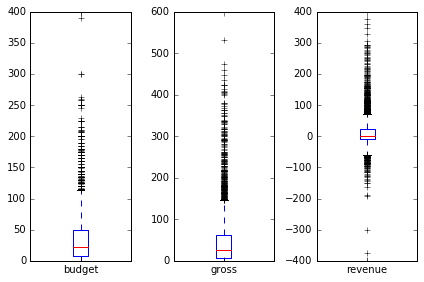

In [74]:
# Focus on revenue_outlier
plt.subplot(1, 3, 1)
revenue_outlier['budget'].plot(kind='box')

plt.subplot(1, 3, 2)
revenue_outlier['gross'].plot(kind='box')

plt.subplot(1, 3, 3)
revenue_outlier['revenue'].plot(kind='box')

plt.tight_layout()

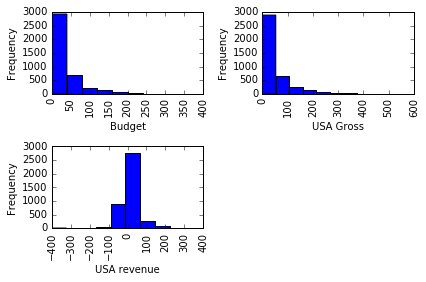

In [73]:
# Focus on revenue_outlier
plt.subplot(2, 2, 1)
revenue_outlier['budget'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('Budget')

plt.subplot(2, 2, 2)
revenue_outlier['gross'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA Gross')

plt.subplot(2, 2, 3)
revenue_outlier['revenue'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA revenue')

plt.tight_layout()


# After movie’s announcement

## Is IMDB score a good indicator of the revenue?
* ### A1_storytelling: From the scatter plots, I can easily tell that high IMDB scores can indicate the movies with high budget and high USA gross. However, movies with high IMDB scores can lead the revenue positively and negatively. If I just eyeball it, there is more chance to make money from the higher IMDB score.


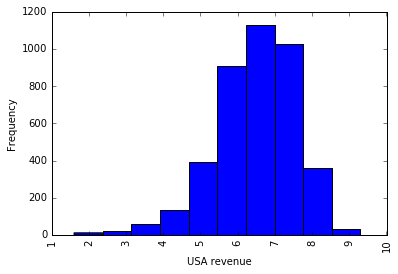

In [14]:
revenue_outlier['imdb_score'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA revenue')

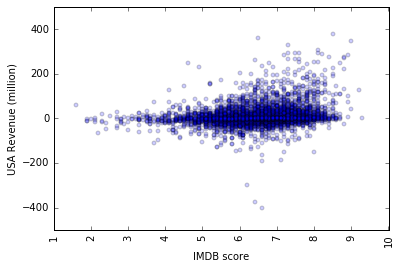

In [15]:
plt.scatter(x='imdb_score', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Revenue (million)')

In [16]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [17]:
revenue = list(revenue_outlier.revenue)
imdb = list(revenue_outlier.imdb_score)

In [39]:
# Observed sample correlation
r = pearson_r(revenue, imdb)
print 'Correelation coefficient between revenue and imdb score is ' + str(r)

Correelation coefficient between revenue and imdb score is 0.239884821283


# Is IMDB score a good indicator of the revenue?
* ### A1_inference: There is 23% correlation between revenue and imdb score. I use permutation to simulate the null hypothesis and compare to the correlation of observed samples. The null hypothesis is reject and 23% correlation is significant in the perspective of statistical significance.

In [26]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    revenue_permuted = np.random.permutation(revenue)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(revenue_permuted, imdb)

# Compute p-value: p
p = np.sum(perm_replicates >= r) / 10000.0
print('p-val = ', p)

('p-val = ', 0.0)


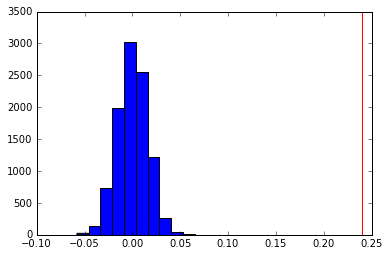

In [27]:
plt.hist(perm_replicates)
plt.axvline(x=r, color='red')

In [36]:
a, b = np.polyfit(imdb, revenue, 1)

In [37]:
line_x = np.array([0, 10])
line_y = line_x * a + b

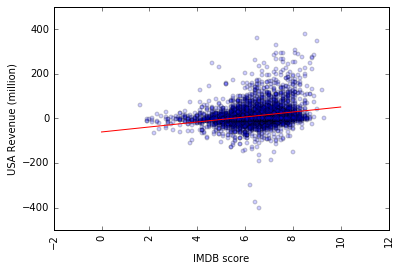

In [38]:
plt.scatter(x='imdb_score', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Revenue (million)')

plt.plot(line_x, line_y, color = 'red')

# Before movie’s announcement

## Q2: Is the budget correlated to the revenue? Invest more, earn more back?
### A2_storytelling: Interestingly, the budget and revenue seem to have a negative correlation instead of positive one if the movies don't make profits.

**Compare budget, gross, and revenue in scatter plots**

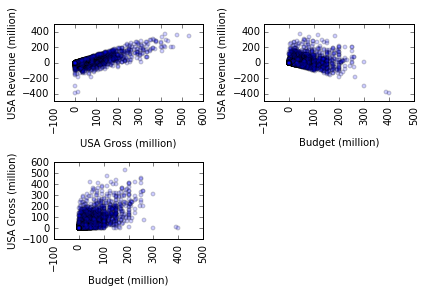

In [72]:
plt.subplot(2,2,2)
plt.scatter(x='budget', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('Budget (million)')
plt.ylabel('USA Revenue (million)')

plt.subplot(2,2,1)
plt.scatter(x='gross', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('USA Gross (million)')
plt.ylabel('USA Revenue (million)')

plt.subplot(2,2,3)
plt.scatter(x='budget', y='gross', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('Budget (million)')
plt.ylabel('USA Gross (million)')

plt.tight_layout()

## Q2: Is the budget correlated to the revenue? Invest more, earn more back?
### A2_inference: Interms of whole sample population, there is only 2.94% correlation. The p-value of that is 0.0255 which is between alpha = 0.01 and alpha = 0.05. I don't think it is strong enough to conclude  the correlation  is true in a practical way. I further separate sample population into two parts: the positive revenue and the negative revenue. Then I compare them to the budget, respectively. The result shows that there is a ~76% correlation between revenue and budget in movies with a negative revenue. On the other hand, there is a ~35% correlation between revenue and budget in movies with a positive revenue. Both of them are statistically significant. I would conclude that it is not necessary to make more money when the investors invest more money. The budget has to be in an adequate range for the movie's success (HIGH REVENUE). 

**Focus on the budget and the revenue**
1. whole population
2. movies with negative revenue
3. movies with positvie revenue

In [69]:
# 1. Whole populaiton
budget = list(revenue_outlier['budget'])
r = pearson_r(revenue, budget)
print 'The correlation coefficient of revenue and budget: ' + str(r)

The correlation coefficient of revenue and budget: -0.0294811063014


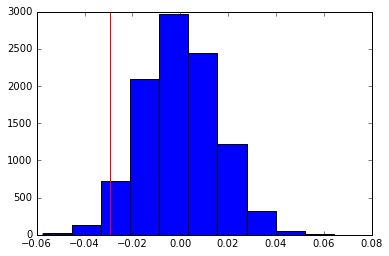

In [67]:
# simulation based on null hypothesis
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    revenue_permuted = np.random.permutation(revenue)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(revenue_permuted, budget)

plt.hist(perm_replicates)
plt.axvline(x=r, color='red')

In [68]:
p = np.sum(perm_replicates <= r) / 10000.0
print 'p value: ' + str(p)

p value: 0.0255


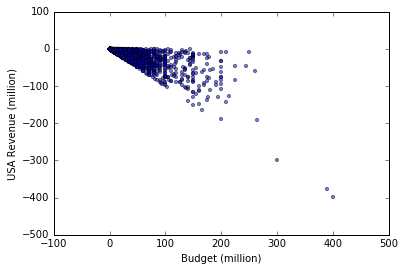

In [47]:
# For negative revenue
money_loss = revenue_outlier[(revenue_outlier['revenue'] < 0)]
plt.scatter(x='budget', y='revenue', data=money_loss, s=10, alpha=0.5)
plt.xlabel('Budget (million)')
plt.ylabel('USA Revenue (million)')

In [59]:
money_loss_revenue = list(money_loss['revenue'])
money_loss_budget = list(money_loss['budget'])
r= pearson_r(money_loss_revenue, money_loss_budget)
print 'The correlation coefficient of revenue and budget in the movies with a negative revenue: ' + str(r)

The correlation coefficient of revenue and budget in the movies with a negative revenue: -0.761551837316


In [54]:
# make sure the observation is not caused by a lot of zero revenue
len(money_loss[money_loss.revenue == 0])

0

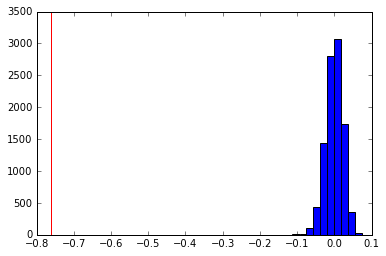

In [60]:
# simulation based on null hypothesis
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    revenue_permuted = np.random.permutation(money_loss_revenue)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(revenue_permuted, money_loss_budget)

plt.hist(perm_replicates)
plt.axvline(x=r, color='red')

In [61]:
p = np.sum(perm_replicates <= r) / 10000.0
print 'p value: ' + str(p)

p value: 0.0


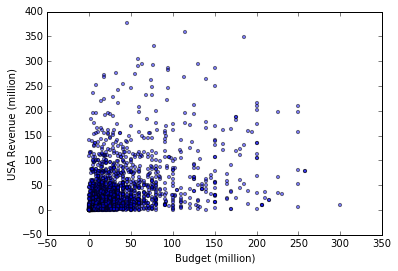

In [48]:
# For positive revenue
money_earn = revenue_outlier[(revenue_outlier['revenue'] > 0)]
plt.scatter(x='budget', y='revenue', data=money_earn, s=10, alpha=0.5)
plt.xlabel('Budget (million)')
plt.ylabel('USA Revenue (million)')

In [63]:
money_earn_revenue = list(money_earn['revenue'])
money_earn_budget = list(money_earn['budget'])
r = pearson_r(money_earn_revenue, money_earn_budget)
print 'The correlation coefficient of revenue and budget in the movies with a positive revenue: ' + str(r)

The correlation coefficient of revenue and budget in the movies with a positive revenue: 0.358784821857


In [62]:
# make sure the observation is not caused by a lot of zero revenue
len(money_earn[money_earn.revenue == 0])

0

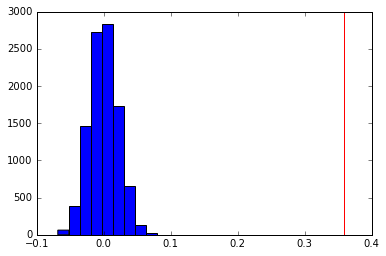

In [64]:
# simulation based on null hypothesis
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    revenue_permuted = np.random.permutation(money_earn_revenue)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(revenue_permuted, money_earn_budget)

plt.hist(perm_replicates)
plt.axvline(x=r, color='red')

In [65]:
p = np.sum(perm_replicates >= r) / 10000.0
print 'p value: ' + str(p)

p value: 0.0


## Q3: Is there a seasonal trend of revenue?
### A3_storytelling: In terms of revenue, June might be the best timing to release the new movie.

** import imdb_month dictionary that I scrape from the IMDB website when I did data wrangling **

In [75]:
import json
with open('imdb_month.json', 'r') as f:
    imdb_month = json.load(f)

In [76]:
df_date = df.copy()

In [78]:
df_date['month'] = df_date.movie_imdb_link.map(imdb_month)

In [80]:
df_date = df_date.dropna(axis=0)

In [81]:
df_date.loc[:, 'month'] = df_date['month'].str[0]

In [82]:
len(df_date[df_date.month.isnull()])

2

In [83]:
df_date = df_date.dropna(axis=0)

In [84]:
len(df_date[df_date.month.isnull()])

0

In [85]:
df_date.loc[:, 'month'] =df_date.loc[:, 'month'].str.replace('\d+', '')

In [86]:
df_date.loc[:, 'month'] =df_date.loc[:, 'month'].str.replace(' ', '')

In [87]:
df_date.shape

(3569, 31)

In [151]:
# change column name
# df_date = df_date.rename(index=str, columns={'date':'month'})

** change month to datetime in a new column **

In [89]:
df_date['month_dt'] = pd.to_datetime(df_date['month'], format='%B', errors='coerce').dt.month

** check outlier **

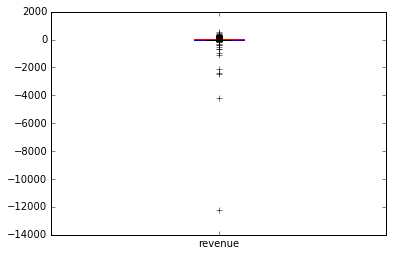

In [90]:
df_date['revenue'].plot(kind='box')

In [91]:
df_date_outlier = df_date[(df_date.revenue > -400)]

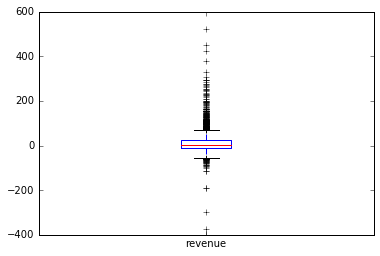

In [92]:
df_date_outlier['revenue'].plot(kind='box')

** check with plots **

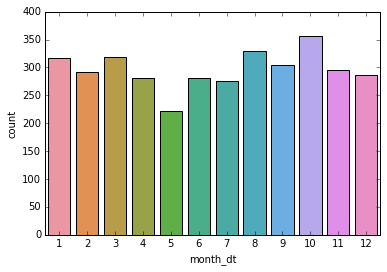

In [93]:
sns.countplot(x='month_dt', data=df_date_outlier)

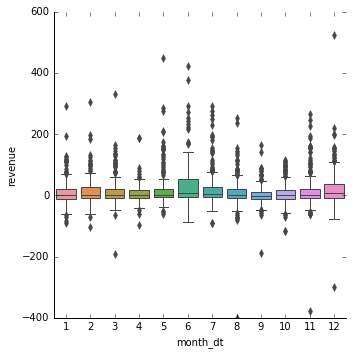

In [94]:
sns.catplot(x='month_dt', y='revenue', kind='box', data=df_date_outlier)

## Q3: Is there a seasonal trend of revenue?
### A3_inference: From the boxplot, June's revenue is obviously higher than other months. However, are they significant in a statistical significance context? I compare the mean revenue of June to all other months individually. In a more stringent condition (alpha = 0.01), the results indicate that May, June, July, November, and December are good for announcing the movies compared to other months. Although the results are pretty reasonable, I now understand it in a more statistical sense.

** Focus on june and december **

In [116]:
june = df_date_outlier[df_date_outlier['month'] == 'June']['revenue'].values
december = df_date_outlier[df_date_outlier['month'] == 'December']['revenue'].values

In [117]:
june_mean = np.mean(june)
december_mean = np.mean(december)

In [126]:
mean_dif = june_mean - december_mean
print mean_dif

9.5074064109


In [120]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [121]:
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [124]:
# Mix up june and december
revenue_concat = np.concatenate((june, december))

# Compute mean of revenue (june + december): mean_total
mean_total = np.mean(revenue_concat)

# Generate shifted arrays
june_shifted = june - june_mean + mean_total
december_shifted = december - december_mean + mean_total

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_june = draw_bs_reps(june_shifted, np.mean, 10000)
bs_replicates_december = draw_bs_reps(december_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates_dif = bs_replicates_june - bs_replicates_december

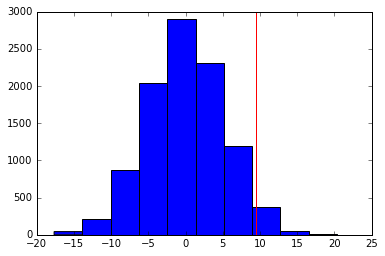

In [127]:
plt.hist(bs_replicates_dif)
plt.axvline(x=mean_dif, color='red')

In [128]:
p = np.sum(bs_replicates_dif >= mean_dif) / 10000.0
print 'p value: ' + str(p)

p value: 0.0345


** focus on May and June **

In [129]:
may = df_date_outlier[df_date_outlier['month'] == 'May']['revenue'].values

In [131]:
may_mean = np.mean(may)
mean_dif = june_mean - may_mean
print mean_dif

9.69163826682


In [132]:
# Mix up june and may
revenue_concat = np.concatenate((june, may))

# Compute mean of revenue (june + december): mean_total
mean_total = np.mean(revenue_concat)

# Generate shifted arrays
june_shifted = june - june_mean + mean_total
may_shifted = may - may_mean + mean_total

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_june = draw_bs_reps(june_shifted, np.mean, 10000)
bs_replicates_may = draw_bs_reps(may_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates_dif = bs_replicates_june - bs_replicates_may

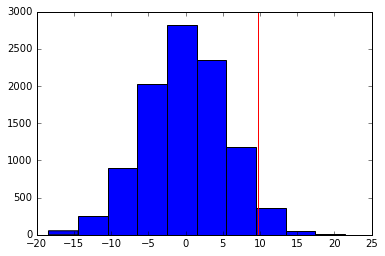

In [133]:
plt.hist(bs_replicates_dif)
plt.axvline(x=mean_dif, color='red')

In [134]:
p = np.sum(bs_replicates_dif >= mean_dif) / 10000.0
print 'p value: ' + str(p)

p value: 0.0389


** compare June's revenue to other month's revenue **

In [136]:
month_list = list(df_date_outlier['month'].unique())
month_list

[u'December',
 u'May',
 u'November',
 u'July',
 u'March',
 u'April',
 u'June',
 u'October',
 u'February',
 u'August',
 u'January',
 u'September']

In [137]:
for i in month_list:
    month = df_date_outlier[df_date_outlier['month'] == i]['revenue'].values
    month_mean = np.mean(month)
    mean_dif = june_mean - month_mean
    # Mix up june and month
    revenue_concat = np.concatenate((june, month))

    # Compute mean of revenue (june + december): mean_total
    mean_total = np.mean(revenue_concat)

    # Generate shifted arrays
    month_shifted = month - month_mean + mean_total

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_month = draw_bs_reps(month_shifted, np.mean, 10000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates_dif = bs_replicates_june - bs_replicates_month
    
    # calculate p value
    p = np.sum(bs_replicates_dif >= mean_dif) / 10000.0
    print i, p

December 0.0398
May 0.039
November 0.0036
July 0.0351
March 0.0015
April 0.0
June 0.214
October 0.0001
February 0.001
August 0.0011
January 0.0003
September 0.0001


# Q4: Is any particular genre making more money?
### A4_storytelling: Animation and family categories could be good profit indicators of movies

In [159]:
df_genre = df.copy()

In [160]:
s = df_genre['genres'].str.split('|', expand=False)

In [161]:
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
dummy = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [163]:
dummy.shape

(4099, 24)

In [162]:
df_genre = pd.concat([df, dummy], axis=1)

In [164]:
# roughly set a boundary for outlier from the boxplot 
df_genre = df_genre[(df_genre.revenue > -400) & (df_genre.revenue < 400)]

** Find out which genre has higher mean amd median in revenue **

In [181]:
genre_list = df_genre.columns[31:]

In [182]:
for i in genre_list:
    temp_yes = df_genre[df_genre[i] == 1]
    temp_no = df_genre[df_genre[i] == 0]
    mean_yes = np.mean(temp_yes['revenue'])
    mean_no = np.mean(temp_no['revenue'])
    median_yes = np.median(temp_yes['revenue'])
    median_no = np.median(temp_no['revenue'])
    mean_dif = mean_yes - mean_no
    median_dif = median_yes - median_no
    if (mean_yes > mean_no) & (median_yes > median_no):
        print i, mean_dif, median_dif

Animation 17.722843095 10.567931
Comedy 6.38153161346 2.34073
Family 14.0596006572 12.804151
Fantasy 7.80266774087 3.313675
Horror 0.758836836301 5.414159
Music 2.89100324033 2.6399735
Romance 0.741877314255 1.049782


** check them in boxplots **

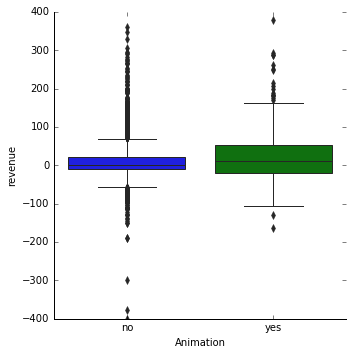

In [120]:
g = sns.catplot(x='Animation', y='revenue', kind='box', data=df_genre)
g.set_xticklabels(['no', 'yes'])

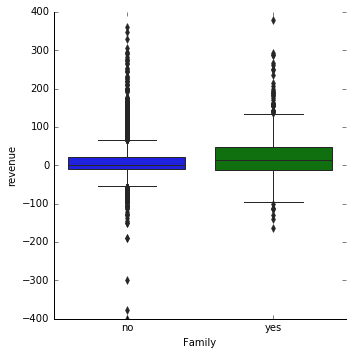

In [158]:
g3 = sns.catplot(x='Family', y='revenue', kind='box', data=df_genre)
g3.set_xticklabels(['no', 'yes'])

# Q4: Is any particular genre makig more money?
### A4_inference: The mean revenue difference between animation movies and non-animation movies is 17 million. Also, the mean revenue difference between family movies and non-family movies is 14 million. I compare them to simulated null hypothesis from bootstrapping and calculate their p values. The results show that those mean revenue differences are both significant. 

In [183]:
genre_list = ['Animation', 'Family']

In [184]:
for i in genre_list:
    genre_yes = df_genre[df_genre[i] == 1]['revenue'].values
    genre_no = df_genre[df_genre[i] == 0]['revenue'].values
    mean_dif = np.mean(genre_yes) - np.mean(genre_no)
    # Mix up yes and no
    revenue_concat = np.concatenate((genre_yes, genre_no))

    # Compute mean of revenue (yes+no): mean_total
    mean_total = np.mean(revenue_concat)

    # Generate shifted arrays
    genre_yes_shifted = genre_yes - np.mean(genre_yes) + mean_total
    genre_no_shifted = genre_no - np.mean(genre_no) + mean_total

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_yes= draw_bs_reps(genre_yes_shifted, np.mean, 10000)
    bs_replicates_no= draw_bs_reps(genre_no_shifted, np.mean, 10000)
    
    # Get replicates of difference of means: bs_replicates
    bs_replicates_dif = bs_replicates_yes - bs_replicates_no
    
    # calculate p value
    p = np.sum(bs_replicates_dif >= mean_dif) / 10000.0
    print i, p

Animation 0.0011
Family 0.0


# Backup informaiton

# correlation matrix and heatmap

In [154]:
df_r = revenue_outlier.drop(['Unnamed: 0'], axis=1)
corr = df_r.corr()

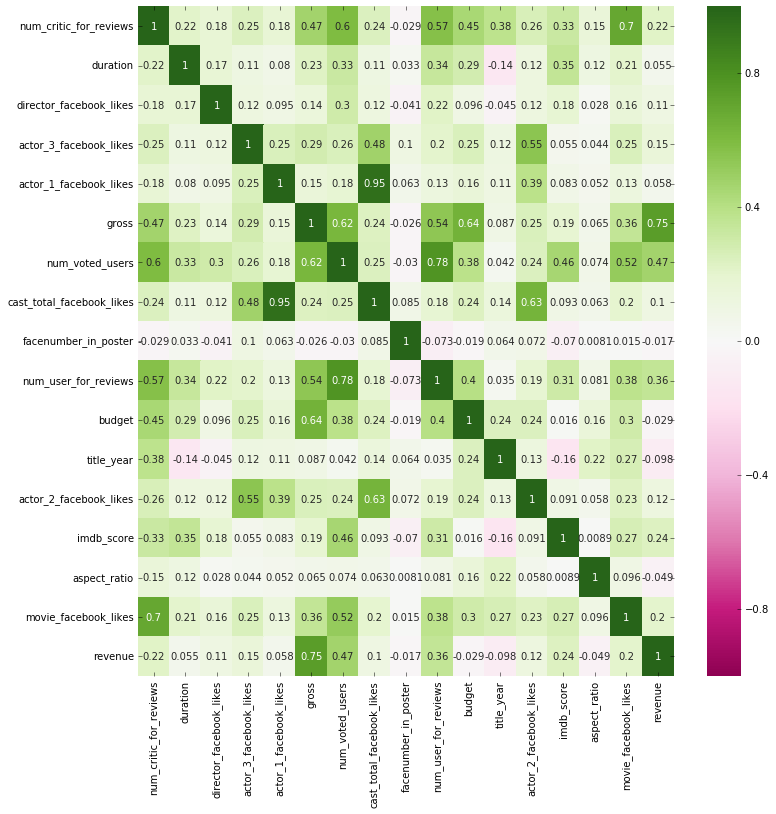

In [179]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='PiYG', vmax=1, vmin=-1, annot=True, annot_kws={"size": 10})

In [165]:
df_genre = df_genre.drop(['Unnamed: 0'], axis=1)
corr_genre = df_genre.corr()

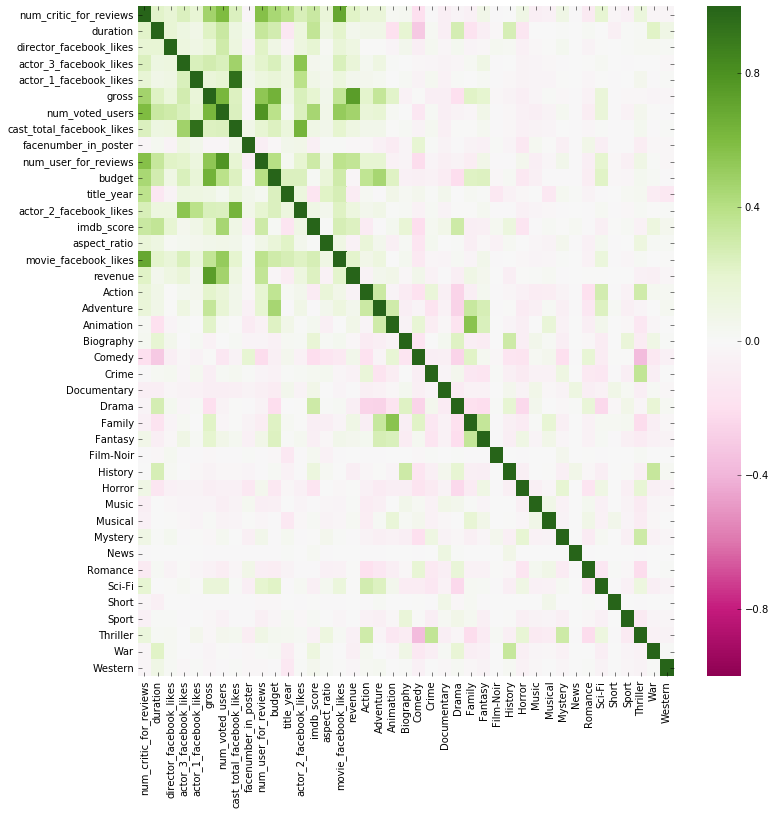

In [180]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_genre, xticklabels=corr_genre.columns, yticklabels=corr_genre.columns, cmap='PiYG', vmax=1, vmin=-1)

# ECDF

In [30]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

In [31]:
x_totalgross, y_totalgross = ecdf(total_revenue_outlier['total_revenue'])
x_gross, y_gross = ecdf(total_revenue_outlier['revenue'])

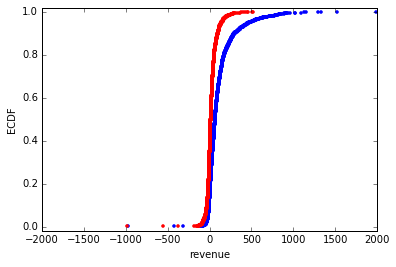

In [32]:
plt.plot(x_totalgross, y_totalgross, marker='.', linestyle='none')
plt.xlabel('total_revenue')
plt.ylabel('ECDF')
plt.margins(0.02)

plt.plot(x_gross, y_gross, marker='.', linestyle='none', color='red')
plt.xlabel('revenue')
plt.ylabel('ECDF')
plt.xlim(-2000, 2000)
plt.margins(0.02)